In [5]:
from pathlib import Path

# Explicit project root (safe after restarts)
project_root = Path.cwd()
print("Current working directory:", project_root)

train_path = project_root / "data" / "raw" / "DRIVE" / "training" / "images"
images = list(train_path.glob("*.tif"))

print("Number of training images:", len(images))
images[:3]



Current working directory: C:\Users\amrit\FundusGNN_Project
Number of training images: 20


[WindowsPath('C:/Users/amrit/FundusGNN_Project/data/raw/DRIVE/training/images/21_training.tif'),
 WindowsPath('C:/Users/amrit/FundusGNN_Project/data/raw/DRIVE/training/images/22_training.tif'),
 WindowsPath('C:/Users/amrit/FundusGNN_Project/data/raw/DRIVE/training/images/23_training.tif')]

C:\Users\amrit\AppData\Local\Temp\ipykernel_22876\3996499893.py:22: UserWarning: Use keyword parameter `sigmas` instead of `scale_range` and `scale_range` which will be removed in version 0.17.
  vessels_frangi = frangi(


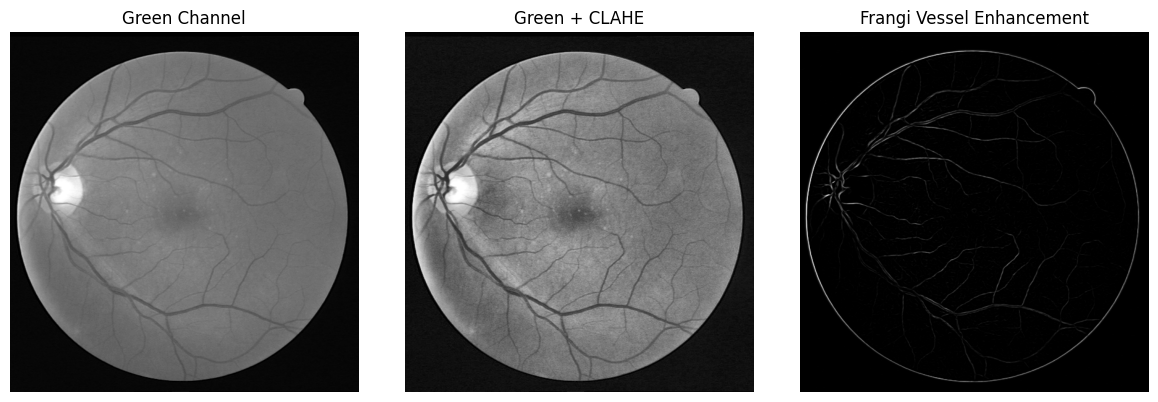

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import frangi

# ---- Load ONE image safely ----
img_path = images[0]
img = cv2.imread(str(img_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# ---- Green channel extraction ----
green = img[:, :, 1]

# ---- CLAHE (same as Phase 1) ----
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
green_clahe = clahe.apply(green)

# ---- Normalize for Frangi ----
green_norm = green_clahe / 255.0

# ---- Frangi vessel enhancement ----
vessels_frangi = frangi(
    green_norm,
    scale_range=(1, 3),
    scale_step=1
)

# ---- Visualization ----
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(green, cmap="gray")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(green_clahe, cmap="gray")
plt.title("Green + CLAHE")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(vessels_frangi, cmap="gray")
plt.title("Frangi Vessel Enhancement")
plt.axis("off")

plt.tight_layout()
plt.show()


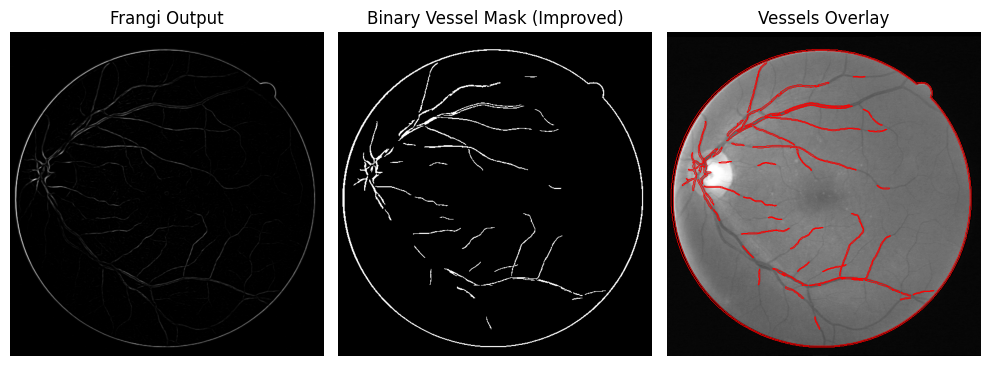

In [7]:
from skimage.morphology import remove_small_objects, remove_small_holes

# ---- Step 1: Normalize Frangi output ----
frangi_norm = (vessels_frangi - vessels_frangi.min()) / (
    vessels_frangi.max() - vessels_frangi.min()
)

# ---- Step 2: Manual threshold (keeps thin vessels) ----
binary_vessels = frangi_norm > 0.08   # key change

# ---- Step 3: Morphological cleanup ----
binary_vessels = remove_small_objects(binary_vessels, min_size=30)
binary_vessels = remove_small_holes(binary_vessels, area_threshold=30)

# ---- Step 4: Visualization ----
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(vessels_frangi, cmap="gray")
plt.title("Frangi Output")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(binary_vessels, cmap="gray")
plt.title("Binary Vessel Mask (Improved)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(green, cmap="gray")
plt.contour(binary_vessels, colors='red', linewidths=0.5)
plt.title("Vessels Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()



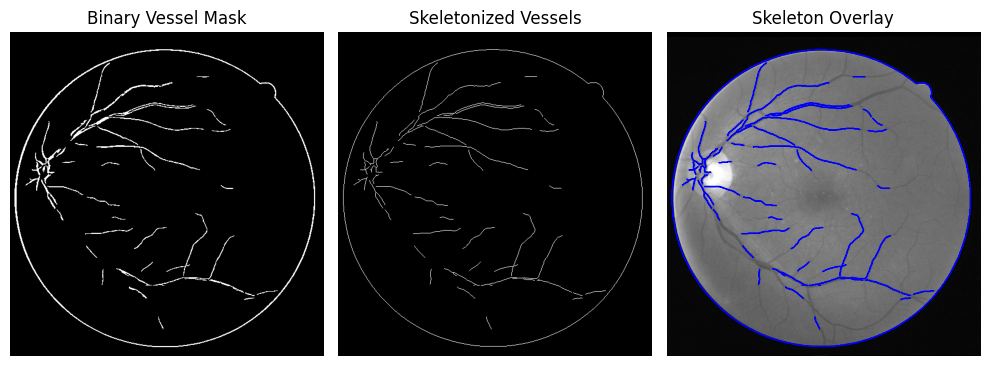

In [8]:
from skimage.morphology import skeletonize

# ---- Step 1: Skeletonization ----
skeleton = skeletonize(binary_vessels)

# ---- Visualization ----
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(binary_vessels, cmap="gray")
plt.title("Binary Vessel Mask")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(skeleton, cmap="gray")
plt.title("Skeletonized Vessels")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(green, cmap="gray")
plt.contour(skeleton, colors='blue', linewidths=0.7)
plt.title("Skeleton Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()


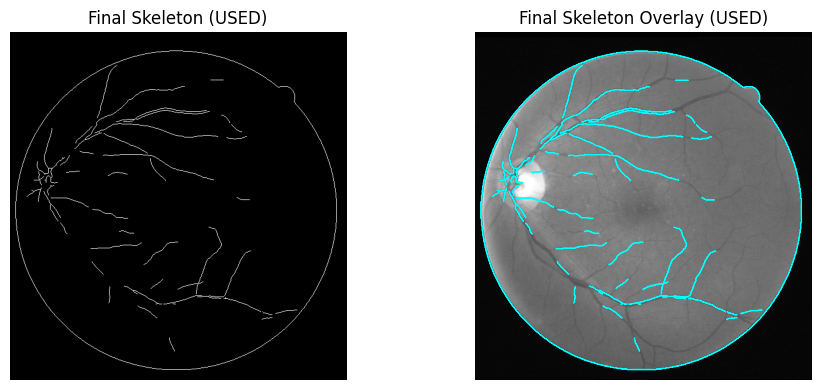

In [11]:


# ---- Visualization of final skeleton ----
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(skeleton, cmap="gray")
plt.title("Final Skeleton (USED)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(green, cmap="gray")
plt.contour(skeleton, colors='cyan', linewidths=0.7)
plt.title("Final Skeleton Overlay (USED)")
plt.axis("off")

plt.tight_layout()
plt.show()


